In [22]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

In [2]:
st = gd.SimplexTree()

In [3]:
st.insert([0, 1])
st.insert([1, 2])
st.insert([3, 1])

True

In [5]:
st_gen = st.get_filtration() 
for splx in st_gen :
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)


In [8]:
st.dimension()

1

In [7]:
st.num_vertices()

4

In [9]:
st.num_simplices()

7

In [10]:
st.insert([0, 1, 2], filtration = 0.1)
st.insert([1, 2, 3], filtration = 0.2)
st.insert([0, 1, 3], filtration = 0.4)
st_gen = st.get_filtration() 

for splx in st_gen :
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)
([0, 2], 0.1)
([0, 1, 2], 0.1)
([2, 3], 0.2)
([1, 2, 3], 0.2)
([0, 3], 0.4)
([0, 1, 3], 0.4)


In [23]:
torus = gd.read_points_from_off_file(off_file='data/tore3D_1307.off')
ac = gd.AlphaComplex(points=torus)
st = ac.create_simplex_tree()

In [24]:
points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
# We want to plot the alpha-complex with alpha=0.005 by default.
# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.005])

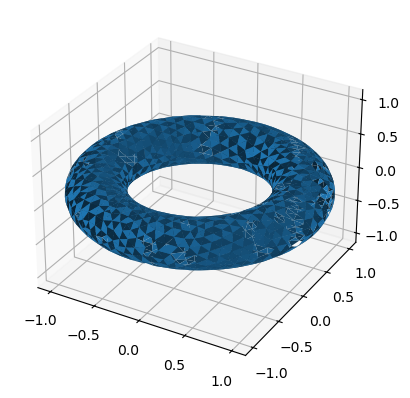

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
l = ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles = triangles)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)

plt.show()